<a href="https://colab.research.google.com/github/cyril-john/TrafficAnalysis/blob/main/TrafficPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/archive.zip

Archive:  drive/MyDrive/archive.zip
  inflating: traffic.csv             


In [6]:
df = pd.read_csv('drive/MyDrive/TrafficPrediction/data/traffic.csv')

In [17]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()
df.head()


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 204, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 180, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 6209, in reset_index
    new_obj.insert(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4772, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert DateTime, already exists


,DateTime,Junction,Vehicles,ID
DateTime,,,,
2015-11-01 00:00:00,2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,2015-11-01 04:00:00,1,9,20151101041


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 192, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 180, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 6209, in reset_index
    new_obj.insert(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4772, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert DateTime, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 204, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 180, in _preprocess_dataframe
    dataframe = data

In [18]:
df.drop(columns=['DateTime'], inplace=True)

In [19]:
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [7]:
df.index = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df.head()

,DateTime,Junction,Vehicles,ID
DateTime,,,,
2015-11-01 00:00:00,2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,2015-11-01 04:00:00,1,9,20151101041


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 192, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 180, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 6209, in reset_index
    new_obj.insert(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4772, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert DateTime, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 204, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 180, in _preprocess_dataframe
    dataframe = data

vehicles = df['Vehicles']
vehicles.plot()

In [22]:
J1  = df[df['Junction']==1]
J2  = df[df['Junction']==2]
J3 =   df[df['Junction']==3]
J4 =   df[df['Junction']==4]
J5 =   df[df['Junction']==5]

vehciles_at_J1 = J1['Vehicles']
vehciles_at_J2 = J2['Vehicles']

In [23]:
vehciles_at_J1.head()

DateTime
2015-11-01 00:00:00    15
2015-11-01 01:00:00    13
2015-11-01 02:00:00    10
2015-11-01 03:00:00     7
2015-11-01 04:00:00     9
Name: Vehicles, dtype: int64

In [33]:
#save

#logic take input for first 5 hours and predict 6th hour
# [[1],[2],[3],[4],[5]]   [6]
# [[2],[3],[4],[5],[6]]   [7]
# [[3],[4],[5],[6],[7]]   [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X =[]
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label  = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [42]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X =[]
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label  = df_as_np[i+window_size]
    y.append(label)
  return np.array(X).reshape(-1, window_size, 1), np.array(y)

In [43]:
WINDOW_SIZE=5
X, y = df_to_X_y(vehciles_at_J1, WINDOW_SIZE)
X.shape, y.shape

((14587, 5, 1), (14587,))

In [44]:
X_train , y_train = X[:8000], y[:8000]
X_val , y_val = X[8000:8500], y[8000:8500]
X_test , y_test = X[8000:], y[8000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8000, 5, 1), (8000,), (500, 5, 1), (500,), (6587, 5, 1), (6587,))

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(LSTM(64, input_shape=(WINDOW_SIZE, 1)))
model1.add(Dense(8,'relu'))
model1.add(Dense(1))

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
history = model1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[cp])


Epoch 1/100
250/250 [==============================] - 8s 23ms/step - loss: 54.9774 - root_mean_squared_error: 7.4147 - val_loss: 228.1100 - val_root_mean_squared_error: 15.1033
Epoch 2/100
250/250 [==============================] - 8s 31ms/step - loss: 41.0047 - root_mean_squared_error: 6.4035 - val_loss: 171.4089 - val_root_mean_squared_error: 13.0923
Epoch 3/100
250/250 [==============================] - 6s 22ms/step - loss: 33.3069 - root_mean_squared_error: 5.7712 - val_loss: 134.0076 - val_root_mean_squared_error: 11.5762
Epoch 4/100
250/250 [==============================] - 6s 24ms/step - loss: 28.8711 - root_mean_squared_error: 5.3732 - val_loss: 109.3484 - val_root_mean_squared_error: 10.4570
Epoch 5/100
250/250 [==============================] - 7s 29ms/step - loss: 26.3086 - root_mean_squared_error: 5.1292 - val_loss: 92.1348 - val_root_mean_squared_error: 9.5987
Epoch 6/100
250/250 [==============================] - 5s 22ms/step - loss: 24.7418 - root_mean_squared_error: 4

In [51]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [53]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Train Actual':y_train})
train_results


250/250 [==============================] - 1s 3ms/step


,Train Predictions,Train Actual
0,9.371747,6
1,8.095925,9
2,10.369616,8
3,10.144770,11
4,13.289233,12
...,...,...
7995,35.071899,40
7996,42.784977,48
7997,53.158134,65
7998,67.659500,66


<Axes: >

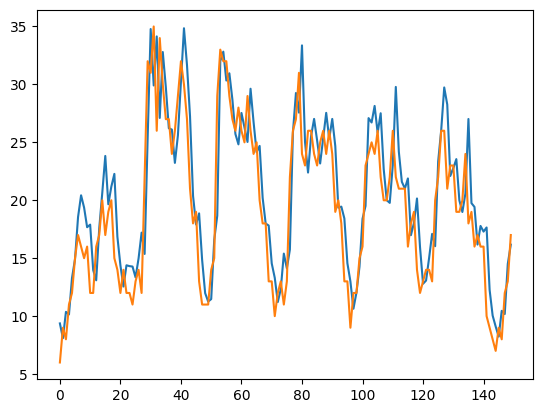

In [65]:
train_results['Train Predictions'][:150].plot()
train_results['Train Actual'][:150].plot()

In [61]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Validation Predictions':val_predictions, 'Validation Actual':y_val})
val_results

16/16 [==============================] - 0s 3ms/step


,Validation Predictions,Validation Actual
0,65.319710,60
1,61.265221,65
2,64.668694,64
3,61.881641,61
4,60.106792,62
...,...,...
495,40.560394,39
496,32.706474,35
497,30.273272,36
498,32.658630,39


<Axes: >

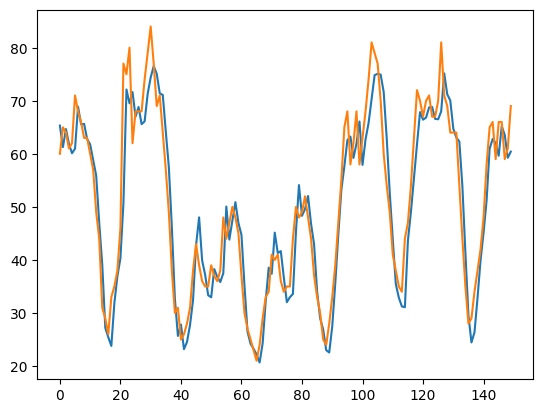

In [64]:
val_results['Validation Predictions'][:150].plot()
val_results['Validation Actual'][:150].plot()